In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
df = pd.read_csv('dataset/Churn_Modelling.csv')

# Display first few rows
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

*Explore the Data*
Check for missing values and column data types.

In [2]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Data Preprocessing

In [3]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Label Encoding for Gender
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


scaler = StandardScaler()
num_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Tenure"]

df[num_cols] = scaler.fit_transform(df[num_cols])


Define Features (X) and Target (y)

In [5]:
# Define X (features) and y (target)
X = df.drop(columns=["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train a Machine Learning Model

In [ ]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [6]:

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)



Evaluate Model Performance

Random Forest Accuracy: 0.8615
Logistic Regression Accuracy: 0.8080
Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



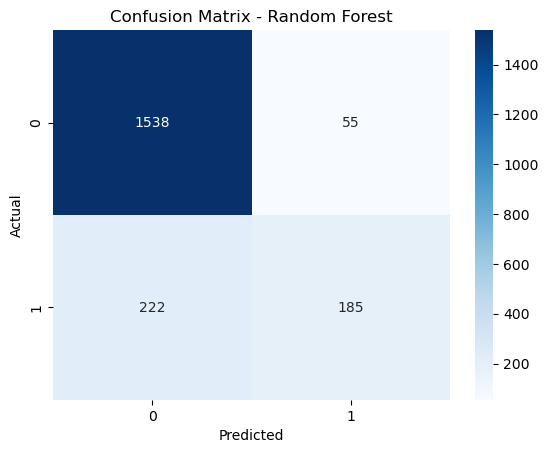

In [10]:
# Ensure rf_model is defined
if 'rf_model' not in globals():
	rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
	rf_model.fit(X_train, y_train)

# Make predictions for Random Forest if not already done
if 'y_pred_rf' not in globals():
	y_pred_rf = rf_model.predict(X_test)

# Accuracy System
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

# Classification Report  
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
# Plot Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [11]:
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]):.4f}")
print(f"Logistic Regression ROC-AUC Score: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]):.4f}")


Random Forest ROC-AUC Score: 0.8530
Logistic Regression ROC-AUC Score: 0.7748
